In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import numpy.random as r
from tqdm import tqdm
import os
from scipy.stats import chi2
from scipy.stats import norm

In [2]:
råNGRIP = pd.read_excel('rådata NGRIP_acc_Vinther_etal_2009_GICC05_16Sep2010.xlsx', header = 58, usecols = [0,1,2,3,4,5,6,7,8])
råGRIP = pd.read_excel('GRIP_acc_Vinther_etal_2009_GICC05_16Sep2010.xlsx', header = 54, usecols = [0,1,2,3,4,5,6,7])

NGRIP, GRIP = råNGRIP.to_numpy(), råGRIP.to_numpy()
NGRIPakk0, GRIPakk0 = NGRIP[:, 6], GRIP[:, 5]
NGRIPår0, GRIPår0 = NGRIP[:, 1], GRIP[:, 1]
NGRIP_delevation, GRIP_delevation = NGRIP[:, 8], GRIP[:, 7]

# Indlæsning af data fra 1000-kørslen

In [3]:
formkonstanter_900 = np.load(os.getcwd() + "\\1000 langtidskørsler\kkørsel_formkonstantliste.npz")
formkonstanter_900 = formkonstanter_900['k_list_langtidskørsel_plot']
år_900 = np.load(os.getcwd() + "\\1000 langtidskørsler\kkørsel_årstal.npz")
år_900 = år_900['år_list']

R_900 = np.load(os.getcwd() + f"\\1000 langtidskørsler\kkørsel_radier0.npz")
R_900 = R_900['R_list']
H_900 = []
for i in range(len(R_900)):
    h = formkonstanter_900[i] * np.sqrt(R_900[i])
    H_900.append(h)
H_900 = np.array(H_900)
for i in range(1,900):
    radier = np.load(os.getcwd() + f"\\1000 langtidskørsler\kkørsel_radier{i}.npz")
    radier = radier['R_list']
    H_i = []
    for i in range(len(radier)):
        h = formkonstanter_900[i] * np.sqrt(radier[i])
        H_i.append(h)
    H_i = np.array(H_i)
    H_900 = np.vstack((H_900, H_i))


# Indlæsning af 100-kørslerne

In [4]:
formkonstanter_100 = np.load(os.getcwd() + "\\1000 langtidskørsler\kørsel_formkonstantlistee.npz")
formkonstanter_100 = formkonstanter_100['k_list_langtidskørsel_plot']
år_100 = np.load(os.getcwd() + "\\1000 langtidskørsler\kørsel_årstal.npz")
år_100 = år_100['år_list']

R_100 = np.load(os.getcwd() + f"\\1000 langtidskørsler\kørsel_radier0.npz")
R_100 = R_100['R_list']
H_100 = []
for i in range(len(R_100)):
    h = formkonstanter_100[i] * np.sqrt(R_100[i])
    H_100.append(h)
H_100 = np.array(H_100)
for i in range(1,100):
    radier = np.load(os.getcwd() + f"\\1000 langtidskørsler\kørsel_radier{i}.npz")
    radier = radier['R_list']
    H_i = []
    for i in range(len(radier)):
        h = formkonstanter_100[i] * np.sqrt(radier[i])
        H_i.append(h)
    H_i = np.array(H_i)
    H_100 = np.vstack((H_100, H_i))


In [5]:
print(år_100 - år_900)

[0. 0. 0. ... 0. 0. 0.]


In [6]:
Højder = np.vstack((H_100, H_900))
print(np.shape(Højder))
print(Højder)

(1000, 34000)
[[3000.         2999.99319983 3000.00016119 ... 3140.70143295
  3140.69347774 3140.68567962]
 [3000.         2999.9932028  3000.00179765 ... 3179.54838817
  3179.54033047 3179.53244413]
 [3000.         2999.99320155 3000.00111013 ... 3163.34442886
  3163.33641392 3163.32856443]
 ...
 [3000.         2999.99320088 3000.0007392  ... 3154.53231642
  3154.52432474 3154.51649525]
 [3000.         2999.99320475 3000.00286929 ... 3204.47989113
  3204.4717676  3204.46382443]
 [3000.         2999.9932005  3000.00053196 ... 3149.58735766
  3149.57937902 3149.57156075]]


In [7]:
print(formkonstanter_900)

[4.56282123 4.56280822 4.56279521 ... 4.12064717 4.12063416 4.12062115]


In [16]:
H_gns = np.mean(Højder, axis = 0)
H_err = np.std(Højder, axis = 0)
dH = H_gns - H_gns[0]
#dH_err = np.sqrt(2) * H_err
dH_err = np.sqrt(H_err**2 + H_err[0]**2)

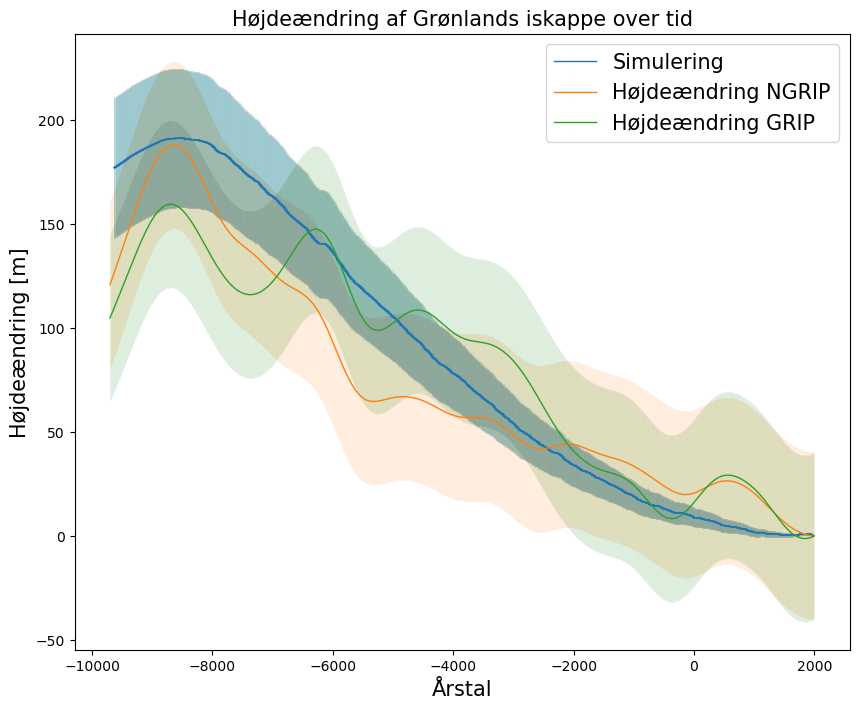

In [12]:
dhøjde_err_NGRIP = np.ones(len(NGRIP_delevation)) * 40
dhøjde_err_GRIP = np.ones(len(GRIP_delevation)) * 40

plt.figure(figsize = (10,8))
plt.title('Højdeændring af Grønlands iskappe over tid', fontsize = 15)
plt.xlabel('Årstal', fontsize = 15)
plt.ylabel('Højdeændring [m]', fontsize = 15)
markers, caps, bars = plt.errorbar(år_100, dH, yerr = dH_err, linewidth = 1, elinewidth= 0.5, label = 'Simulering')
[bar.set_alpha(0.01) for bar in bars]

markers2, caps2, bars2 = plt.errorbar(NGRIPår0, NGRIP_delevation, yerr = dhøjde_err_NGRIP, linewidth = 1, elinewidth=0.5, label = 'Højdeændring NGRIP')
[bar.set_alpha(0.01) for bar in bars2]
marksers3, caps3, bars3 = plt.errorbar(GRIPår0, GRIP_delevation, yerr = dhøjde_err_GRIP, linewidth = 1, elinewidth=0.5, label = 'Højdeændring GRIP')
[bar.set_alpha(0.01) for bar in bars3]
plt.legend(fontsize = 15)
#plt.savefig('Resultater af 1000 simuleringer.png')

# p-værdi på z-værdi af sidste punkt

In [17]:
z_NGRIP = abs(dH[-1] - NGRIP_delevation[-1])/np.sqrt(dH_err[-1]**2 + dhøjde_err_NGRIP[-1]**2)
p_NGRIP = 2 * norm.sf(z_NGRIP)
z_GRIP = abs(dH[-1] - GRIP_delevation[-1])/np.sqrt(dH_err[-1]**2 + dhøjde_err_GRIP[-1]**2)
p_GRIP = 2 * norm.sf(z_GRIP)
print('z-værdi for NGRIP:', z_NGRIP)
print('z-værdi for GRIP:', z_GRIP)
print('p-værdi for NGRIP:', p_NGRIP)
print('p-værdi for GRIP:', p_GRIP)

z-værdi for NGRIP: 1.2061148609467347
z-værdi for GRIP: 1.5480044882867803
p-værdi for NGRIP: 0.22777320553633984
p-værdi for GRIP: 0.1216212159029704


In [11]:
dH_interpol = np.interp(GRIPår0, år_100, dH)
H_err_interpol = np.interp(GRIPår0, år_100, H_err)

z_NGRIP_0 = abs(dH[-1] - NGRIP_delevation[-1])/np.sqrt((dhøjde_err_NGRIP[-1])**2 + )
z_GRIP_0 = abs(dH[-1] - GRIP_delevation[-1])/(dhøjde_err_NGRIP[-1])

p_NGRIP_0 = 2*norm.sf(z_NGRIP_0)
p_GRIP_0 = 2*norm.sf(z_GRIP_0)

årstal_indekser_2 = np.array([int(len(dH_interpol)/6) - 1, int(2*len(dH_interpol)/6) -1, int(3*len(dH_interpol)/6) -1, int(4*len(dH_interpol)/6) -1, int(5*len(dH_interpol)/6) -1, len(dH_interpol) -1])

for i in årstal_indekser_2:
    z_NGRIP = abs(dH_interpol[i] - NGRIP_delevation[i])/(dhøjde_err_NGRIP[i] + H_err_interpol[i])
    z_GRIP = abs(dH_interpol[i] - GRIP_delevation[i])/(dhøjde_err_NGRIP[i] + H_err_interpol[i])
    z_GNS = abs(dH_interpol[i] - (GRIP_delevation[i] + NGRIP_delevation[i])/2)/(dhøjde_err_GRIP[i] * 2**(-1/2))

    p_NGRIP = 2*norm.sf(z_NGRIP)
    p_GRIP = 2*norm.sf(z_GRIP)
    p_GNS = 2*norm.sf(z_GNS)

    #print(GRIPår0[i])
    #print(z_NGRIP, p_NGRIP)
    #print(z_GRIP, p_GRIP)
    #print(z_GNS, p_GNS)

print(p_NGRIP_0, z_NGRIP_0)
print(p_GRIP_0, z_GRIP_0)

0.16032867812446483 1.403966994692039
0.07155476818798352 1.801940494692039


In [13]:
print(år_100[-1])
print(NGRIPår0[-1])
print(GRIPår0[-1])

-9624.4764
-9704.0
-9704.0


# Histogrammer

999.6054513776306
33.32018171258769
6.216122205133751e-191


<Figure size 640x480 with 0 Axes>

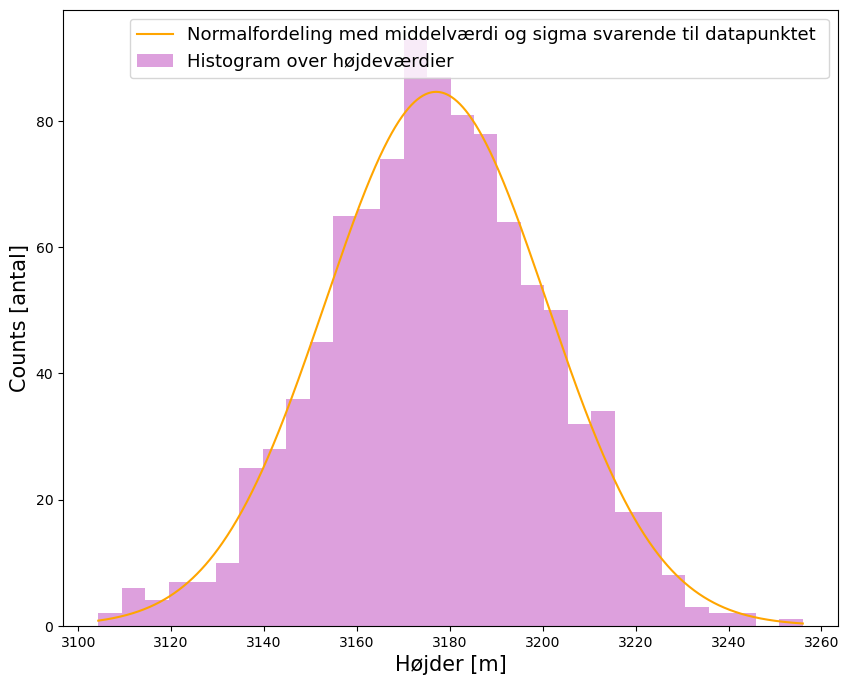

In [ ]:
antal_bins = 30
counts_tjek, bins_tjek, bla = plt.hist(Højder[:,-1], bins = antal_bins)
bin_edges = (bins_tjek[0:-1] + bins_tjek[1:])/2
plt.clf()
areal = sum(counts_tjek * np.diff(bins_tjek))
def gauss(x, mu, sigma):
    y = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-1/2 * (x - mu)**2/sigma**2)
    return y
dummy = np.linspace(min(Højder[:,-1]), max(Højder[:,-1]), 1000)
dummy_counts = gauss(dummy, np.mean(Højder[:,-1]), np.std(Højder[:,-1]))
model_counts = np.interp(bin_edges, dummy, dummy_counts)

plt.figure(figsize = (10,8))
plt.plot(dummy, dummy_counts * areal, label = 'Normalfordeling med middelværdi og sigma svarende til datapunktet ', color = 'orange')
plt.hist(Højder[:,-1], bins = antal_bins, label = 'Histogram over højdeværdier', color = 'plum')
plt.legend(fontsize = 13)
plt.xlabel('Højder [m]', fontsize = 15)
plt.ylabel('Counts [antal]', fontsize = 15)
plt.savefig('Histogram over sidste højdedatapunkt.png')

usikkerheder = np.array([])
for counts in counts_tjek:
    if counts == 0:
        usikkerhed = np.mean(np.sqrt(counts_tjek))
        usikkerheder = np.append(usikkerheder, usikkerhed)
    else:
        usikkerhed = np.sqrt(counts)
        usikkerheder = np.append(usikkerheder, usikkerhed)

chi_red_test = chi_red(counts_tjek, model_counts, usikkerheder)
chi_test = chi(counts_tjek, model_counts, usikkerheder)
p_chi = chi2.sf(chi_test, len(counts_tjek))

print(chi_test)
print(chi_red_test)
print(p_chi)

In [47]:
årstal_indekser = [34000 - 1, 28000 - 1, 22000 - 1, 16000 - 1, 10000 - 1, 4000 - 1]
def gauss(x, mu, sigma):
    y = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-1/2 * (x - mu)**2/sigma**2)
    return y

histogrammer = []

dummys = []

dummy_countss = []

for i in årstal_indekser:
    antal_bins = 30
    counts, bins, bla = plt.hist(Højder[:,i], bins = antal_bins)
    
    plt.clf()
    areal = sum(counts * np.diff(bins))

    dummy = np.linspace(min(Højder[:,i]), max(Højder[:,i]), 1000)
    #print(dummy)
    dummy_counts = gauss(dummy, np.mean(Højder[:,i]), np.std(Højder[:,i]))
    #print(max(dummy_counts))

    dummys.append(dummy)
    dummy_countss.append(dummy_counts)

0.016739454010450263
0.01832453613047484
0.024339714226395994
0.036447296280042216
0.06640025169059732
0.19103696053667282


<Figure size 640x480 with 0 Axes>

print(histogrammer)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


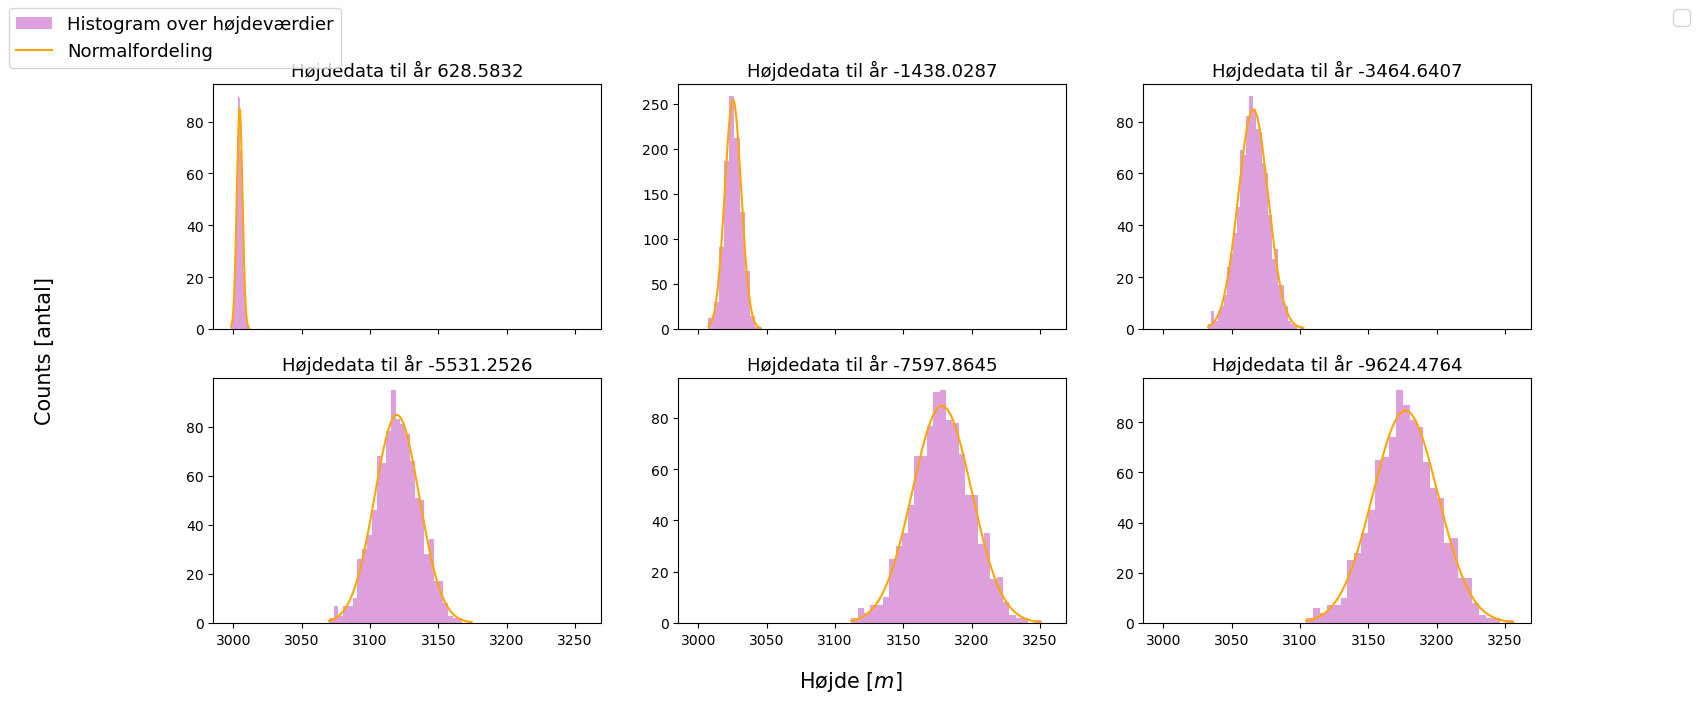

In [77]:
årstal_indekser = [34000 - 1, 28000 - 1, 22000 - 1, 16000 - 1, 10000 - 1, 4000 - 1]
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, sharex = 'all' ,figsize = (17,7))
#fig.suptitle('Fordeling af højdedata', fontsize = 25)
fig.supxlabel('Højde $[m]$', fontsize = 15)
fig.supylabel('Counts [antal]', fontsize = 15)
fig.legend(fontsize = 15)

counts, bins, bla = ax1.hist(Højder[:,årstal_indekser[5]], bins = antal_bins, label = 'Histogram over højdeværdier', color = 'plum')
areal = sum(counts * np.diff(bins))
ax1.plot(dummys[5], dummy_countss[5] * areal, label = 'Normalfordeling', color = 'orange')
ax1.set_title(f'Højdedata til år {år_100[årstal_indekser[5]]}', fontsize = 13)
#ax1.vline(np.mean(Højder[:,årstal_indekser[5]]), label = 'Gennemsnit')

counts, bins, bla = ax2.hist(Højder[:,årstal_indekser[4]], color = 'plum')
areal = sum(counts * np.diff(bins))
ax2.plot(dummys[4], dummy_countss[4] * areal,  color = 'orange')
ax2.set_title(f'Højdedata til år {år_100[årstal_indekser[4]]}', fontsize = 13)

counts, bins, bla = ax3.hist(Højder[:,årstal_indekser[3]], bins = antal_bins, color = 'plum')
areal = sum(counts * np.diff(bins))
ax3.plot(dummys[3], dummy_countss[3] * areal, color = 'orange')
ax3.set_title(f'Højdedata til år {år_100[årstal_indekser[3]]}', fontsize = 13)

counts, bins, bla = ax4.hist(Højder[:,årstal_indekser[2]], bins = antal_bins, color = 'plum')
areal = sum(counts * np.diff(bins))
ax4.plot(dummys[2], dummy_countss[2] * areal, color = 'orange')
ax4.set_title(f'Højdedata til år {år_100[årstal_indekser[2]]}', fontsize = 13)

counts, bins, bla = ax5.hist(Højder[:,årstal_indekser[1]], bins = antal_bins,  color = 'plum')
areal = sum(counts * np.diff(bins))
ax5.plot(dummys[1], dummy_countss[1] * areal,  color = 'orange')
ax5.set_title(f'Højdedata til år {år_100[årstal_indekser[1]]}', fontsize = 13)

counts, bins, bla = ax6.hist(Højder[:,årstal_indekser[0]], bins = antal_bins, color = 'plum')
areal = sum(counts * np.diff(bins))
ax6.plot(dummys[0], dummy_countss[0] * areal, color = 'orange')
ax6.set_title(f'Højdedata til år {år_100[årstal_indekser[0]]}', fontsize = 13)

fig.legend(fontsize = 13, loc = 'upper left')

plt.savefig('Histogrammer.png')